In [1]:
# Balance data
#    Objectif: Deal with the probleme of unbalanced data using several technics
#    Input: 
#     preprocessed data without PCA:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#   Output:
#    Balanced data:
#        x_st_train.csv 
#        y_st_train.csv 

#    Author: SOUAD BOUTANE 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#subplot
from pylab import *

In [3]:
####################################    Balance DATA     ################################
######################################## LOAD DATA ####################################

X = np.genfromtxt('../data/x_train.csv', delimiter=',')
Y=np.genfromtxt('../data/y_train.csv', delimiter=',')


In [4]:
X.shape

(1660852, 9)

In [5]:
#To plot data

def plot_data(X, y,label):
    #histogram for class size
    
    subplot(1,2,1)
    pd.value_counts(y).plot.bar()
    plt.title(label)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()
    '''
    #plot class
    plt.subplot(1,2,2)
    plt.scatter(X[100,0], X[100,2], alpha=0.2,c=y[100])
    plt.title('Class for first 1000 transaction')
    plt.legend(loc='upper right')
    plt.figure(figsize=(15,10))
    plt.show()
  '''

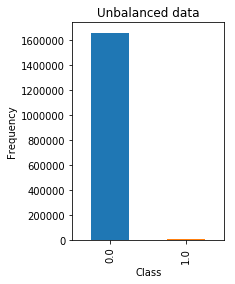

In [7]:
plot_data(X, Y,'Unbalanced data')

After UnderSampling, the shape of training: (3311782, 9)


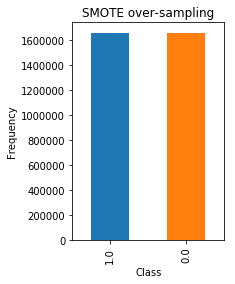

In [8]:
####################################    DATA PREPROCESSING     ################################
  #################################### OVERSAMPLING SMOTE ########################################
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority',k_neighbors=6)
X_sm, Y_sm = smote.fit_sample(X, Y)

print('After UnderSampling, the shape of training: {}'.format(X_sm.shape))
plot_data(X_sm, Y_sm,'SMOTE over-sampling')

In [9]:
#Save dataTraining and dataTest
np.savetxt('../data/x_sm_train.csv', X_sm, delimiter=",")
np.savetxt('../data/y_sm_train.csv', Y_sm, delimiter=",")

b= 80000 a= 0 x shape (1,)
b= 160000 a= 80000 x shape (79978,)
b= 240000 a= 160000 x shape (159955,)
b= 320000 a= 240000 x shape (239929,)
b= 400000 a= 320000 x shape (319908,)
b= 480000 a= 400000 x shape (399880,)
b= 560000 a= 480000 x shape (479860,)
b= 640000 a= 560000 x shape (559838,)
b= 720000 a= 640000 x shape (639813,)
b= 800000 a= 720000 x shape (719795,)
b= 880000 a= 800000 x shape (799770,)
b= 960000 a= 880000 x shape (879746,)
b= 1040000 a= 960000 x shape (959724,)
b= 1120000 a= 1040000 x shape (1039703,)
b= 1200000 a= 1120000 x shape (1119687,)
b= 1280000 a= 1200000 x shape (1199662,)
b= 1360000 a= 1280000 x shape (1279646,)
b= 1440000 a= 1360000 x shape (1359630,)
b= 1520000 a= 1440000 x shape (1439613,)
b= 1600000 a= 1520000 x shape (1519588,)
b= 1600000 a= 1600000 x shape (1599562,)
b= 1600000 a= 1600000 x shape (1660811,)
After UnderSampling, the shape of training: (1660811, 9)


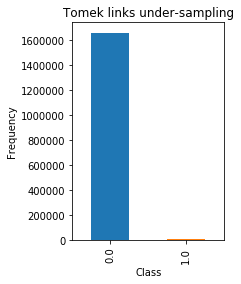

In [14]:
####################################    DATA PREPROCESSING     ################################
#################################### UNDERSAMPLING TOMEKLINK ########################################

from imblearn.under_sampling import TomekLinks

TL = TomekLinks(return_indices=True, ratio='majority')
a=0
X_tl=X[:1]
Y_tl=Y[:1]
for i in range(1,21):
    b=i*80000
    print('b=',b,'a=',a,'x shape',Y_tl.shape)
    x, y,i= TL.fit_sample(X[a:b], Y[a:b])
    X_tl=np.concatenate((X_tl, x), axis=0)
    Y_tl=np.concatenate((Y_tl, y), axis=0)
    a=b
print('b=',b,'a=',a,'x shape',Y_tl.shape)
x, y,i= TL.fit_sample(X[1599588:1660852], Y[1599588:1660852])
X_tl=np.concatenate((X_tl, x), axis=0)
Y_tl=np.concatenate((Y_tl, y), axis=0)
print('b=',b,'a=',a,'x shape',Y_tl.shape)
     
    
print('After UnderSampling, the shape of training: {}'.format(X_tl.shape))

plot_data(X_tl, Y_tl, 'Tomek links under-sampling')

#It takes many time and doesn't work at the end 

In [ ]:
####################################    DATA PREPROCESSING     ################################
###################################### Unbalanced data ########################################

#Unbalanced data
from imblearn.combine import SMOTETomek

#---------------------- OverSampling and UnderSampling

smt = SMOTETomek(ratio='auto',random_state=0)
x_ts, y_ts = smt.fit_sample(X[:800000], Y[:800000])


print('After OverUnderSampling, the shape of train_X: {}'.format(x_ts.shape))
plot_data(x_ts, y_ts, 'TomekSmote under-over-sampling')
